## 安然数据
首先确定目的是为了进行数据分析，因此需要从数据分析的过程去看看怎么样使用 R 来进行相关过程。本次将以安然的部分数据来进行分析，重点将以 EDA 的角度来进行：

1. 读取数据
2. 数据清理
3. **探索分析**
    * 单变量分析
    * 双变量分析
    * 多变量分析
4. 建模

In [58]:
default.par <- par()

In [1]:
library(ggplot2)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



### 读取数据
R 同样可以读取多种类型的数据文件，例如Excel、XML、SPSS、SAS 和 MATLAB，剪贴板，甚至是网络数据。常用的函数中需要注意，`read.csv()` 和 `read.csv2()` 的差异——后者默认是使用`;` 作为分隔符，`,` 作为千分位的 CSV 文件类型。对于其他异常数据作为缺失值，可以通过 `na.strings` 参数进行调整——`na.strings=c("NULL", "#N/A", "#DIV/0")`。

<font size=1 color="green">补充信息：
    <ol>
        <li>如果需要保存相应的数据，那么可以使用 <code>write.table</code> 等函数</li>
        <li>此外如果需要<b>交互</b>，可以使用 <code>readline()</code></li>
        <li>下载数据，可以使用 <code>download.file()</code> 或者 <code>RCurl</code>包获取 HTML 或 XML 数据，而 <code>XML</code> 包中的相关函数可以进行页面解析
    </ol>
</font>

In [2]:
df <- read.csv("./data/enron.csv")

### 清理数据
#### 评估数据
通过相应的函数获取到了数据信息，那么接下来需要了解数据信息以确定接下来的数据清洗的相对应的工作。Python 中 Pandas 提供了很多方便的方式进行数据访问，同样地在 R 中可以使用一些简单的函数来完成相应的工作：

1. 访问 `data.frame` 的前后部分数据，`head()` 与 `tail()`
2. 数据总体信息，例如字段名称以及数据类型 `str()`
3. 字段列名称，`names()`
4. 数据维度信息，`dim()`、`nrow()` 以及 `ncol()`，此外还可以使用 `NROW()` 和 `NCOL()` 来获取向量数据的维度——是将向量作为了一维矩阵
5. 判断数据是否为缺失值，`is.nan()`。此外需要注意 R 是区分缺失值和占位符值——`is.nan()` 和 `is.na()` 检测的是两种情况
6. 行或列方向求和， `rowSums()` 与 `colSums()`

In [3]:
# 使用 head 函数访问前部分数据
head(df, n=2)

Name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,...,304805,152,FALSE,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,...,NaN,NaN,FALSE,NaN,NaN,NaN,NaN,NaN,182466,257817


In [4]:
# 了解数据整体信息
str(df)

'data.frame':	146 obs. of  22 variables:
 $ Name                     : Factor w/ 146 levels "ALLEN PHILLIP K",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ bonus                    : num  4175000 NaN NaN 1200000 400000 ...
 $ deferral_payments        : num  2869717 178980 NaN 1295738 260455 ...
 $ deferred_income          : num  -3081055 NaN -5104 -1386055 -201641 ...
 $ director_fees            : num  NaN NaN NaN NaN NaN ...
 $ email_address            : Factor w/ 112 levels "a..martin@enron.com",..: 80 77 29 77 21 77 97 105 77 15 ...
 $ exercised_stock_options  : num  1729541 257817 4046157 6680544 NaN ...
 $ expenses                 : num  13868 3486 56301 11200 129142 ...
 $ from_messages            : num  2195 NaN 29 NaN NaN ...
 $ from_poi_to_this_person  : num  47 NaN 39 NaN NaN NaN 144 228 NaN NaN ...
 $ from_this_person_to_poi  : num  65 NaN 0 NaN NaN NaN 386 108 NaN NaN ...
 $ loan_advances            : num  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
 $ long_term_incentive      : num  304

In [5]:
# names 函数不仅被用于获取字段名称，而且还可以对列名称进行修改——names(test) <- c("a", "b")
names(df)

[1] "Name"                      "bonus"                    
 [3] "deferral_payments"         "deferred_income"          
 [5] "director_fees"             "email_address"            
 [7] "exercised_stock_options"   "expenses"                 
 [9] "from_messages"             "from_poi_to_this_person"  
[11] "from_this_person_to_poi"   "loan_advances"            
[13] "long_term_incentive"       "other"                    
[15] "poi"                       "restricted_stock"         
[17] "restricted_stock_deferred" "salary"                   
[19] "shared_receipt_with_poi"   "to_messages"              
[21] "total_payments"            "total_stock_value"

In [6]:
# 注意⚠️，此部分作为了解
t <- list(d=c(1, 2, 3))
print(t)
names(t) <- "b"
cat("修改名称后数据：\n")
print(t)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

$d
[1] 1 2 3

修改名称后数据：
$b
[1] 1 2 3



以上内容可以帮助了解数据字段相关类型和名称，如果需要了解数据字段的意义，需要了解数据背景信息：
* 财务特征 : [‘salary’, ‘deferral_payments’, ‘total_payments’, ‘loan_advances’, ‘bonus’, ‘restricted_stock_deferred’, ‘deferred_income’, ‘total_stock_value’, ‘expenses’, ‘exercised_stock_options’, ‘other’, ‘long_term_incentive’, ‘restricted_stock’, ‘director_fees’]

* 邮件特征 : [‘to_messages’, ‘email_address’, ‘from_poi_to_this_person’, ‘from_messages’, ‘from_this_person_to_poi’, ‘shared_receipt_with_poi’]

* POI 嫌疑人标签

----
总体来看以上相应的步骤中，可以看出一些相应的信息。首先观察这个数据集的基本信息，有 **146** 条数据，**22** 个变量。这是了解数据的第一步，接下来来看每个字段的字段类型，大部分都是 Num——数值型数据,有一个logi——逻辑型数据，还有factor——因子型数据。查看会发现 factor 数据，email_address 和 Name 是在**读取数据过程中被转换为了 factor 类型；可以通过 `stringAsFactors` 参数进行调整**

如果评估数据其他情况，例如**缺失值**、**异常值**，可以采用其他方式来解决：
* 缺失值  
    * 字段和列数据缺失检查 除了可以使用 `colSums()`, `rowSums()` 配合 `is.na()` 进行计算意外还可以通过其他 package 来进行处理，例如 `VIM` 中 `aggr`进行可视化显示缺失情况或者显示统计数据
    * 缺失数据检测，`is.na()` 可以对每个元素数据进行判断，`complete.cases()` 可以对整行数据进行判读是否完全缺失——如果数据完整，即没有缺失值返回 TRUE，反之为 FALSE

In [7]:
# 各字段缺失值情况
colSums(is.na(df))[1:4]

Name             bonus deferral_payments   deferred_income 
                0                64               107                97

In [102]:
sum(is.na(df))

[1] 1323

In [104]:
complete.cases(df)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE

In [68]:
library(VIM)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

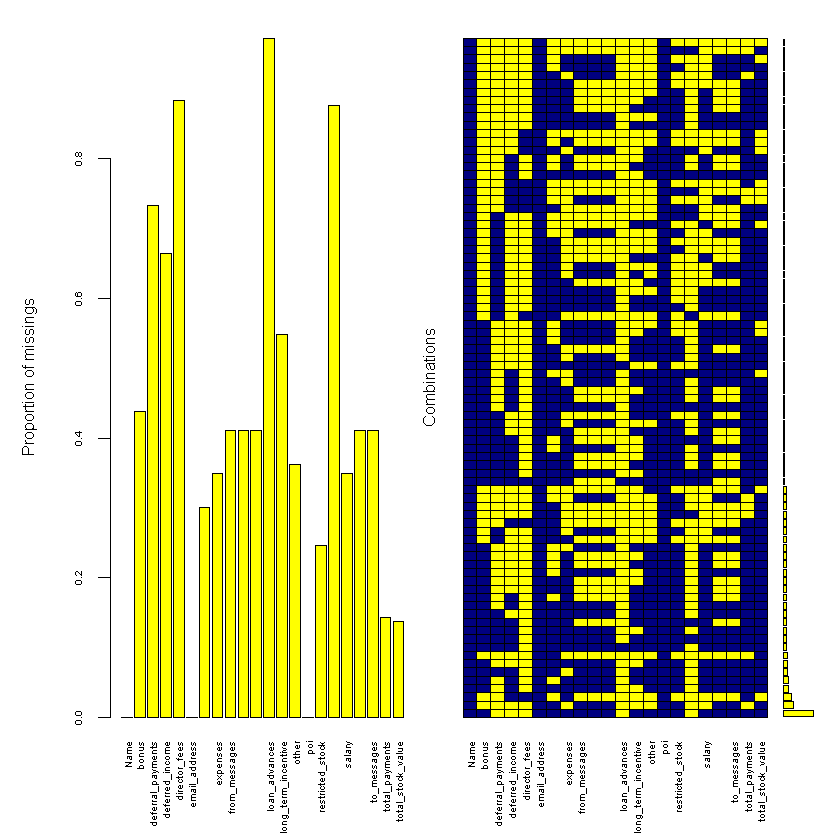

In [67]:
# 右侧图形右侧条形图是一个比例情况，需要结合⏰ mice 的 md.pattern 数据来解读
aggr(df, sort.vars=TRUE, cex.lab=.8, cex.axis=.5, gap=2, col=c('navyblue','yellow'))


In [72]:
aggr(df, plot=FALSE)


 Missings in variables:
                  Variable Count
                     bonus    64
         deferral_payments   107
           deferred_income    97
             director_fees   129
   exercised_stock_options    44
                  expenses    51
             from_messages    60
   from_poi_to_this_person    60
   from_this_person_to_poi    60
             loan_advances   142
       long_term_incentive    80
                     other    53
          restricted_stock    36
 restricted_stock_deferred   128
                    salary    51
   shared_receipt_with_poi    60
               to_messages    60
            total_payments    21
         total_stock_value    20

直接得到的数据是是没有进行排序的，如果需要排序的话可以提取出 missings 数值进行排序。
```
missing <- aggr(df, plot=F)$missings
missing[order(missing$Count, decreasing=T),]
```

In [113]:
# 对于缺失值严重的字段，这里直接进行删除处理方案以及后续不需要使用的字段 email_address
df.enron <- subset(df, select = 
                   -c(loan_advances, director_fees, restricted_stock_deferred, restricted_stock_deferred, deferred_income, email_address))

In [57]:
library(mice)
# 注意⏰ 该内容只作补充了解
# 解读 df 的 md.pattern 数据
# 分别表示了每个字段的缺失值模式，1 为该字段无缺失，0 为该字段有缺失值
# 左边表示统计的数量，例如第一行是所有字段均没有缺失值的情况为 22，第二行是缺失 bonus 字段模式为 17 个以此类推。右边数据为选择的缺失模式
md.pattern(df[1:3])

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

,Name,bonus,deferral_payments,
22,1,1,1,0
17,1,0,1,1
60,1,1,0,1
47,1,0,0,2
,0,64,107,171


异常值  异常值判断方法有多种选择，以统计学角度的标准偏差、箱型图检验法检验，或者其他方法进行判断
* 标准偏差法 
* 箱型图检测法 
* 其他检测法 例如通过散点图确认点是否在“群”内进行判断

In [114]:
summary(df.enron)

                 Name         bonus          deferral_payments 
 ALLEN PHILLIP K   :  1   Min.   :   70000   Min.   : -102500  
 BADUM JAMES P     :  1   1st Qu.:  431250   1st Qu.:   81573  
 BANNANTINE JAMES M:  1   Median :  769375   Median :  227449  
 BAXTER JOHN C     :  1   Mean   : 2374235   Mean   : 1642674  
 BAY FRANKLIN R    :  1   3rd Qu.: 1200000   3rd Qu.: 1002672  
 BAZELIDES PHILIP J:  1   Max.   :97343619   Max.   :32083396  
 (Other)           :140   NA's   :64         NA's   :107       
 exercised_stock_options    expenses       from_messages     
 Min.   :     3285       Min.   :    148   Min.   :   12.00  
 1st Qu.:   527886       1st Qu.:  22614   1st Qu.:   22.75  
 Median :  1310814       Median :  46950   Median :   41.00  
 Mean   :  5987054       Mean   : 108729   Mean   :  608.79  
 3rd Qu.:  2547724       3rd Qu.:  79952   3rd Qu.:  145.50  
 Max.   :311764000       Max.   :5235198   Max.   :14368.00  
 NA's   :44              NA's   :51        NA's   :60 

In [110]:
library(purrr)
library(ggplot2)
library(tidyr)
library(dplyr)


Attaching package: 'tidyr'

The following object is masked from 'package:mice':

    complete



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 827 rows containing non-finite values (stat_bin)."

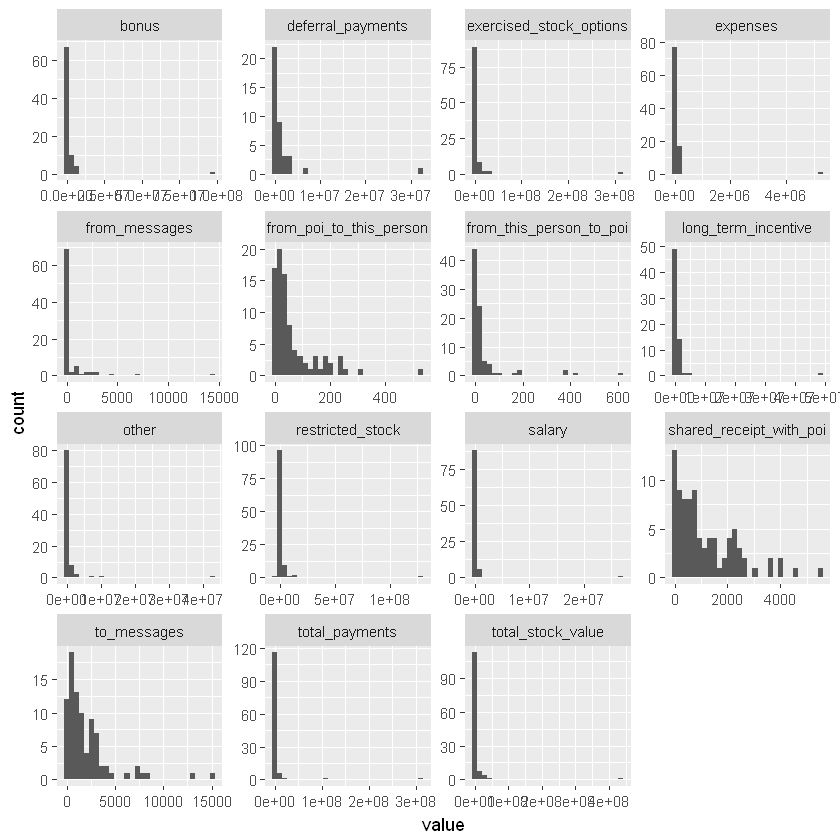

In [117]:
df.enron  %>% 
    keep(is.numeric)  %>% # 删选满足条件数据类型
    gather()  %>% 
    ggplot(aes(value)) + 
    facet_wrap(~key, scales = "free") +
    geom_histogram()

通过以上图形，可以看出很多字段中存在异常值，例如 bonus、deferral_payments。对于异常值是否删除需要根据不同的情况来判断。而这里需要对一场数据进行探索，所以首先需要选出一场数据——可以使用 `boxplot()` 中的 `out` 数据

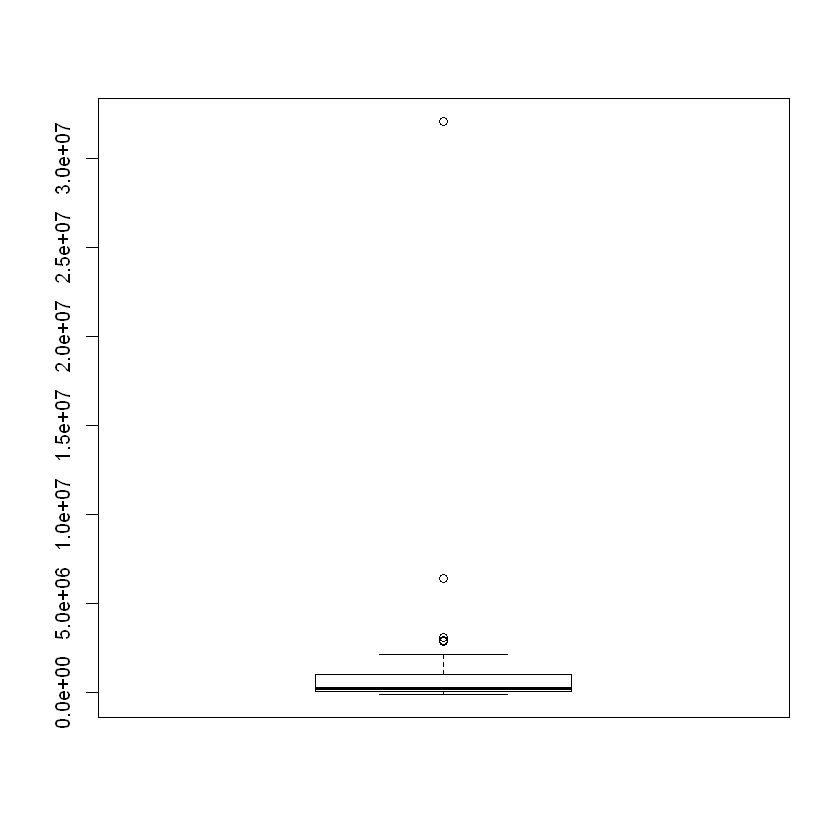

In [135]:
outlier <- boxplot(df.enron$deferral_payments)$out

In [136]:
# 筛选出异常值
df.enron[which(df.enron$deferral_payments %in% outlier),]

,Name,bonus,deferral_payments,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,poi,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
1,ALLEN PHILLIP K,4175000,2869717,1729541,13868,2195,47,65,304805,152,FALSE,126027,201955,1407,2902,4484442,1729541
48,FREVERT MARK A,2000000,6426990,10433518,86987,21,242,6,1617011,7427621,FALSE,4188667,1060932,2979,3275,17252530,14622185
67,HORTON STANLEY C,NaN,3131860,5210569,NaN,1073,44,15,NaN,NaN,FALSE,2046079,NaN,1074,2350,3131860,7256648
69,HUMPHREY GENE E,NaN,2964506,2282768,4994,17,10,17,NaN,NaN,FALSE,NaN,130724,119,128,3100224,2282768
131,TOTAL,97343619,32083396,311764000,5235198,NaN,NaN,NaN,48521928,42667589,FALSE,130322299,26704229,NaN,NaN,309886585,434509511


#### 清理数据

### 参考
1. [Dealing with Missing Data using R](https://medium.com/coinmonks/dealing-with-missing-data-using-r-3ae428da2d17)
2. [在R中填充缺失数据—mice包 - 雪晴数据网](http://www.xueqing.tv/cms/article/98)